In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Notebooks/PAPER_EXPERIMENT")

In [ ]:
!pip install zhconv
!pip install zhon
import matplotlib.pyplot as plt
import pandas as pd
import jieba
import zhconv
import zhon.hanzi
import string
import re
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
train_reviews = pd.read_csv("./ASAP/train.csv")
dev_reviews = pd.read_csv("./ASAP/dev.csv")
test_reviews = pd.read_csv("./ASAP/test.csv")

In [ ]:
test_lsan = pd.read_csv("./MultiLabel_Classification/data/test.csv")

In [ ]:
train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36850 entries, 0 to 36849
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36850 non-null  int64  
 1   review                   36850 non-null  object 
 2   star                     36850 non-null  float64
 3   Location#Transportation  36850 non-null  int64  
 4   Location#Downtown        36850 non-null  int64  
 5   Location#Easy_to_find    36850 non-null  int64  
 6   Service#Queue            36850 non-null  int64  
 7   Service#Hospitality      36850 non-null  int64  
 8   Service#Parking          36850 non-null  int64  
 9   Service#Timely           36850 non-null  int64  
 10  Price#Level              36850 non-null  int64  
 11  Price#Cost_effective     36850 non-null  int64  
 12  Price#Discount           36850 non-null  int64  
 13  Ambience#Decoration      36850 non-null  int64  
 14  Ambience#Noise        

In [ ]:
print(f"#trainingset = {train_reviews.shape[0]}\t"
      f"#missing value = {train_reviews.isnull().sum().sum()}")
print(f"#devset = {dev_reviews.shape[0]}\t\t"
      f"#missing value = {dev_reviews.isnull().sum().sum()}")
print(f"#testset = {test_reviews.shape[0]}\t\t"
      f"#missing value = {test_reviews.isnull().sum().sum()}")

#trainingset = 36850	#missing value = 0
#devset = 4940		#missing value = 0
#testset = 4940		#missing value = 0


# Description

## Comment Dimension Stat

In [ ]:
train_reviews["tag"] = "train"
dev_reviews["tag"] = "dev"
test_reviews["tag"] = "test"

In [ ]:
all_reviews = pd.concat([train_reviews, dev_reviews, test_reviews])

In [ ]:
all_reviews.iloc[:, 3:-1] = all_reviews.iloc[:, 3:-1].applymap(
    lambda x: 0 if x == -2 else 1
)

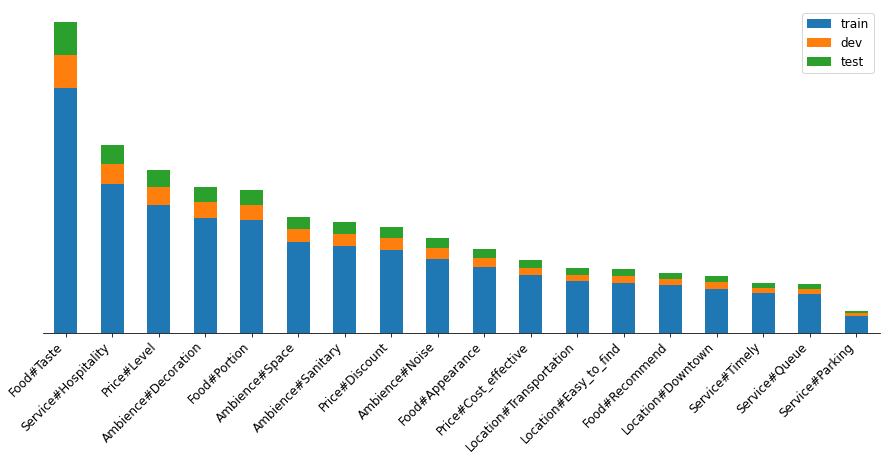

In [ ]:
df2plot = all_reviews.iloc[:, 3:].groupby("tag").sum().T.iloc[:, [-1, 0, 1]].sort_values("train", ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
df2plot.plot(kind="bar", stacked=True, ax=ax)
ax.set_yticks([])
ax.set_xticklabels(df2plot.index, rotation=45, ha="right", fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize=12)
fig.savefig("./Data_Preprocess/statistic.jpg", bbox_inches="tight", dpi=300)

## Sentence Length Stat

In [ ]:
all_reviews["len_tag"] = all_reviews["review"].apply(
    lambda x: "<=100" if len(x) <= 100 else (
        "100~300" if len(x) <= 300 else (
            "300~500" if len(x) <= 500 else ">500"
        )
    )
)

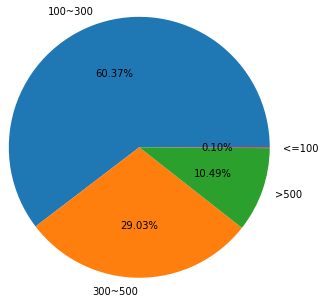

In [ ]:
df2plot = all_reviews["len_tag"].value_counts()
plt.pie(df2plot.values, radius=1.5, labels=df2plot.index, autopct="%1.2f%%")
plt.savefig("./Data_Preprocess/length_stat.jpg", dpi=300, bbox_inches="tight")

# Remove Useless Columns

- So there are 18 fine-grained review dimensions

In [ ]:
train_reviews.drop(["id", "star"], axis=1, inplace=True)
dev_reviews.drop(["id", "star"], axis=1, inplace=True)
test_reviews.drop(["id", "star"], axis=1, inplace=True)

# Simplified and Traditional Conversion

In [ ]:
train_reviews["review"] = train_reviews["review"].apply(
    lambda x: zhconv.convert(x, "zh-cn")
)
dev_reviews["review"] = dev_reviews["review"].apply(
    lambda x: zhconv.convert(x, "zh-cn")
)
test_reviews["review"] = test_reviews["review"].apply(
    lambda x: zhconv.convert(x, "zh-cn")
)

# Tokenization

In [ ]:
# load extended dictionary

jieba.load_userdict("./Data_Preprocess/new_dict.txt")

In [ ]:
# clear punctuations

punctuations = string.punctuation + zhon.hanzi.punctuation
punc_dict = {i: " " for i in punctuations} 
punc_table = str.maketrans(punc_dict)

train_reviews["review_tokenized"] = train_reviews["review"].apply(
    lambda x: x.translate(punc_table)
)
dev_reviews["review_tokenized"] = dev_reviews["review"].apply(
    lambda x: x.translate(punc_table)
)
test_reviews["review_tokenized"] = test_reviews["review"].apply(
    lambda x: x.translate(punc_table)
)

In [ ]:
# tokenize

train_reviews["review_tokenized"] = train_reviews["review_tokenized"].apply(
    lambda x: jieba.lcut(x)   
)
dev_reviews["review_tokenized"] = dev_reviews["review_tokenized"].apply(
    lambda x: jieba.lcut(x)   
)
test_reviews["review_tokenized"] = test_reviews["review_tokenized"].apply(
    lambda x: jieba.lcut(x)   
)

# Clear Stopwords

In [ ]:
with open("Data_Preprocess/stopwords.txt", "r", encoding="utf-8") as fp:
    stopwords = fp.read().split()

In [ ]:
import pandas as pd

train_reviews = pd.read_csv("ASAP_clean/train.csv")
dev_reviews = pd.read_csv("ASAP_clean/dev.csv")
test_reviews = pd.read_csv("ASAP_clean/test.csv")

train_reviews["review_tokenized"] = train_reviews["review_tokenized"].apply(lambda x: eval(x))
dev_reviews["review_tokenized"] = dev_reviews["review_tokenized"].apply(lambda x: eval(x))
test_reviews["review_tokenized"] = test_reviews["review_tokenized"].apply(lambda x: eval(x))

In [ ]:
# "n" means "\n", because "\n" is not cleared totally


extend_stopwords = [" ", "n", "\u2002", "\u2003", "\xa0", "\u3000", "\u0020"]

train_reviews["review_tokenized"] = train_reviews["review_tokenized"].apply(
    lambda x: [w for w in x if w not in stopwords+extend_stopwords]   
)
dev_reviews["review_tokenized"] = dev_reviews["review_tokenized"].apply(
    lambda x: [w for w in x if w not in stopwords+extend_stopwords]   
)
test_reviews["review_tokenized"] = test_reviews["review_tokenized"].apply(
    lambda x: [w for w in x if w not in stopwords+extend_stopwords]   
)

# Store Cleaned Data

In [ ]:
if not os.path.exists("ASAP_clean"):
    os.mkdir("ASAP_clean")

train_reviews.iloc[:, 1:-1] = train_reviews.iloc[:, 1:-1] + 2
dev_reviews.iloc[:, 1:-1] = dev_reviews.iloc[:, 1:-1] + 2
test_reviews.iloc[:, 1:-1] = test_reviews.iloc[:, 1:-1] + 2

train_reviews.to_csv("ASAP_clean/train.csv", encoding="utf-8", index=False)
dev_reviews.to_csv("ASAP_clean/dev.csv", encoding="utf-8", index=False)
test_reviews.to_csv("ASAP_clean/test.csv", encoding="utf-8", index=False)

---

# Construct Dataset For Multi-label Classification Task

In [ ]:
import pandas as pd

In [ ]:
train_reviews = pd.read_csv("ASAP_clean/train.csv")
dev_reviews = pd.read_csv("ASAP_clean/dev.csv")
test_reviews = pd.read_csv("ASAP_clean/test.csv")

In [ ]:
def get_data_for_mlc(data):
    """
    Construct dataset for multi-label classification task
    """
    dimensions = data.columns.tolist()[1:-1]
    dimensions = set([d.split("#")[0] for d in dimensions])
    for d in dimensions:
        data[d] = data.filter(
            like=d+"#"
        ).applymap(lambda x: x != 0).any(axis=1)*1
    data = data[["review", "review_tokenized"]+list(dimensions)]
    return data

In [ ]:
train_reviews = get_data_for_mlc(train_reviews)
dev_reviews = get_data_for_mlc(dev_reviews)
test_reviews = get_data_for_mlc(test_reviews)

In [ ]:
if not os.path.exists("MultiLabel_Classification"):
    os.mkdir("MultiLabel_Classification")


train_reviews.to_csv("MultiLabel_Classification/data/train.csv", encoding="utf-8", index=False)
dev_reviews.to_csv("MultiLabel_Classification/data/dev.csv", encoding="utf-8", index=False)
test_reviews.to_csv("MultiLabel_Classification/data/test.csv", encoding="utf-8", index=False)